In [16]:

# coding: utf-8

# In[1]:

import datetime as dt
import os
import netCDF4 as nc
import matplotlib as mpl

import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable


from salishsea_tools import geo_tools, viz_tools
get_ipython().magic('matplotlib inline')


# In[2]:

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')


# In[3]:

direct = "/ocean/gsgarbi/analysis-giorgio/time_series/results2/20160301_20160330_50d"
traj=np.loadtxt(direct+"/traj.txt", delimiter = ' ')


# In[4]:

np.shape(traj)


# In[5]:

nday=20
tunit=3600
ntfic=1
lmt=1896
# time as fraction of 1 tcyc:
ndaytcyc=nday*24*3600/(tunit*ntfic*lmt)

In [23]:
#Elise's points'

# find the location of the nearest time in the trajectories to the desired time
flocs=np.argmin(np.abs(traj[:,4]-ndaytcyc))
# get the actual time in the traj file
nearestT=traj[flocs,4]
# return only the points matching the desired time
crit=traj[:,4]==nearestT
points=traj[crit,:]


# In[7]:

np.shape(points)


elisespoints = points

1.1363636363636362

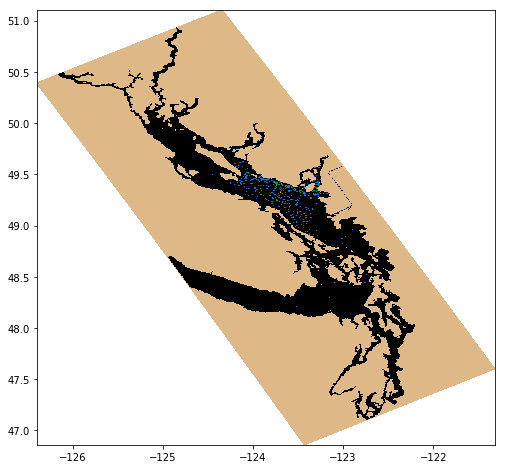

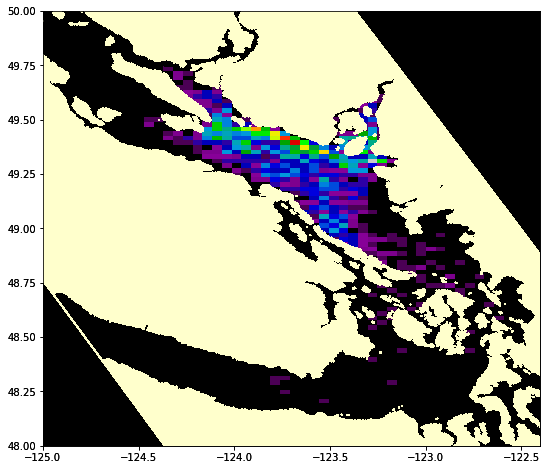

In [24]:
# Elise's plot

# set up array of zeros of shape of model domain; also load tmask, model lons and lats
mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
tmask=np.copy(mesh.variables['tmask'])
mesh.close()
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon=np.copy(fb.variables['nav_lon'])
nav_lat=np.copy(fb.variables['nav_lat'])
fb.close()


# In[9]:

tmask.shape


# In[10]:

griddata=0.0*tmask[0,0,:,:]
griddata.shape


# In[11]:

np.shape(points)[0]


# In[12]:

for ii in range(0,np.shape(points)[0]):
    j,i=geo_tools.find_closest_model_point(points[ii,1],points[ii,2],nav_lon,nav_lat)
    #print(points[ii,1],points[ii,2],j,i)
    griddata[j,i]=griddata[j,i]+1


# In[13]:

fig, axs = plt.subplots(1,1,figsize=(9,8))
mesh0 = axs.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==0,griddata),cmap=cmap)

viz_tools.set_aspect(axs,coords='map')


# In[14]:

# model grid is too small. use hist2d for larger bins, then overlay grid


# In[15]:

lonlim=[np.min(nav_lon),np.max(nav_lon)]
latlim=[np.min(nav_lat),np.max(nav_lat)]

griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


# In[16]:

Jedges,Iedges=np.meshgrid(jedges,iedges)


# In[17]:

Jedges.shape


# In[18]:

griddata.shape


# In[19]:

xl=(-125,-122.4)
yl=(48,50)
fig, axs = plt.subplots(1,1,figsize=(9,8))
mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
axs.set_xlim(xl)
axs.set_ylim(yl)
#axs.plot(-124.0,49.5,'r*')
viz_tools.set_aspect(axs,coords='map')
pos=axs.get_position()
axs2 = plt.axes(pos)
mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
axs2.set_xlim(xl)
axs2.set_ylim(yl)
axs2.patch.set_alpha(0)
viz_tools.set_aspect(axs2,coords='map')


# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:


In [25]:
print (elisespoints)

[[  1.00000000e+00  -1.23343240e+02   4.91659600e+01  -1.27958480e+02
    2.53160000e-01]
 [  2.00000000e+00  -1.22913470e+02   4.87310800e+01  -2.36713400e+01
    2.53160000e-01]
 [  3.00000000e+00  -1.23485730e+02   4.93335600e+01  -1.05728130e+02
    2.53160000e-01]
 ..., 
 [  2.08600000e+03  -1.23229510e+02   4.93043600e+01  -3.74931300e+01
    2.53160000e-01]
 [  2.08700000e+03  -1.23712580e+02   4.92073800e+01  -5.53436300e+01
    2.53160000e-01]
 [  2.08800000e+03  -1.23700290e+02   4.92935800e+01  -8.09071600e+01
    2.53160000e-01]]


In [49]:
#Giorgio's points


points = []

H = 24
nday= 20
tunit= 3600

runlen = 50
outint = 20 * 60 # 20 min in seconds

particle = 1


pph = int(tunit / outint) #points per hour
pp = lmt

position = nday * pph *H

print (pp, pph)

# In[3]:

start = dt.datetime.now()

print ("start: ", start)




with open(direct + "/traj.txt") as file:

    for i, line in enumerate(file):
       
        line = line.split()
        
        line = [float(k) for k in line]
        
        line = np.array(line)
       
        if line[0] == particle:
            index = i+position
            particle += 1
            
        if i == index:
            points.append (line)

points = np.array(points)

print ("time: ", dt.datetime.now() - start)

giorgiospoints = points


1896 3
start:  2017-04-07 15:36:24.928553
time:  0:00:22.440778


In [52]:
print (len(points))

2088


In [50]:
print (len(elisespoints) - len(giorgiospoints))

print (elisespoints == giorgiospoints)

print(giorgiospoints)

0
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 ..., 
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[  1.00000000e+00  -1.23343240e+02   4.91659600e+01  -1.27958480e+02
    2.53160000e-01]
 [  2.00000000e+00  -1.22913470e+02   4.87310800e+01  -2.36713400e+01
    2.53160000e-01]
 [  3.00000000e+00  -1.23485730e+02   4.93335600e+01  -1.05728130e+02
    2.53160000e-01]
 ..., 
 [  2.08600000e+03  -1.23229510e+02   4.93043600e+01  -3.74931300e+01
    2.53160000e-01]
 [  2.08700000e+03  -1.23712580e+02   4.92073800e+01  -5.53436300e+01
    2.53160000e-01]
 [  2.08800000e+03  -1.23700290e+02   4.92935800e+01  -8.09071600e+01
    2.53160000e-01]]


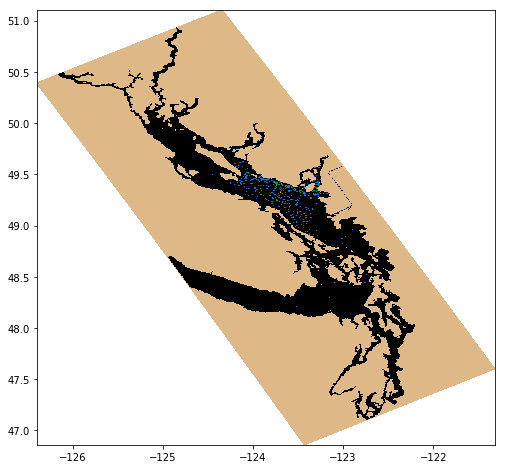

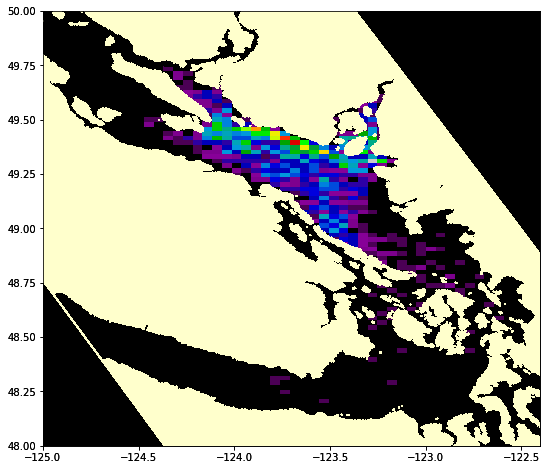

In [51]:
#Giorgio's plot

# In[8]:

# set up array of zeros of shape of model domain; also load tmask, model lons and lats
mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
tmask=np.copy(mesh.variables['tmask'])
mesh.close()
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon=np.copy(fb.variables['nav_lon'])
nav_lat=np.copy(fb.variables['nav_lat'])
fb.close()


# In[9]:

tmask.shape


# In[10]:

griddata=0.0*tmask[0,0,:,:]
griddata.shape


# In[11]:

np.shape(points)[0]


# In[12]:

for ii in range(0,np.shape(points)[0]):
    j,i=geo_tools.find_closest_model_point(points[ii,1],points[ii,2],nav_lon,nav_lat)
    #print(points[ii,1],points[ii,2],j,i)
    griddata[j,i]=griddata[j,i]+1


# In[13]:

fig, axs = plt.subplots(1,1,figsize=(9,8))
mesh0 = axs.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==0,griddata),cmap=cmap)

viz_tools.set_aspect(axs,coords='map')


# In[14]:

# model grid is too small. use hist2d for larger bins, then overlay grid


# In[15]:

lonlim=[np.min(nav_lon),np.max(nav_lon)]
latlim=[np.min(nav_lat),np.max(nav_lat)]

griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


# In[16]:

Jedges,Iedges=np.meshgrid(jedges,iedges)


# In[17]:

Jedges.shape


# In[18]:

griddata.shape


# In[19]:

xl=(-125,-122.4)
yl=(48,50)
fig, axs = plt.subplots(1,1,figsize=(9,8))
mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
axs.set_xlim(xl)
axs.set_ylim(yl)
#axs.plot(-124.0,49.5,'r*')
viz_tools.set_aspect(axs,coords='map')
pos=axs.get_position()
axs2 = plt.axes(pos)
mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
axs2.set_xlim(xl)
axs2.set_ylim(yl)
axs2.patch.set_alpha(0)
viz_tools.set_aspect(axs2,coords='map')

plt.show()


# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:




# In[ ]:



In [ ]:
print (np.array ([1,2]))